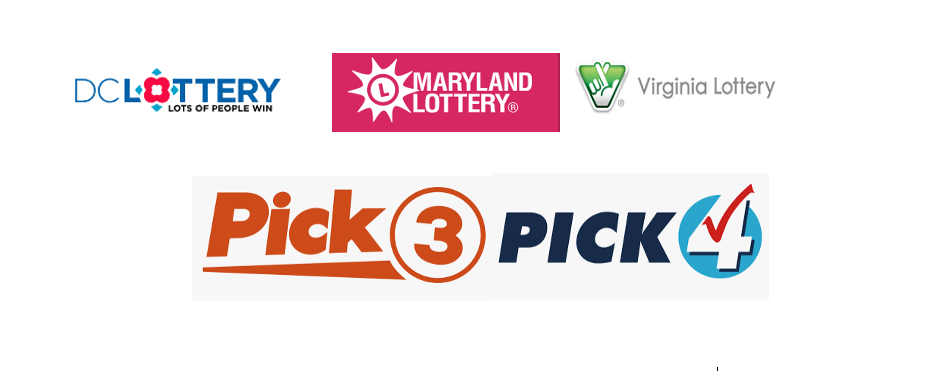

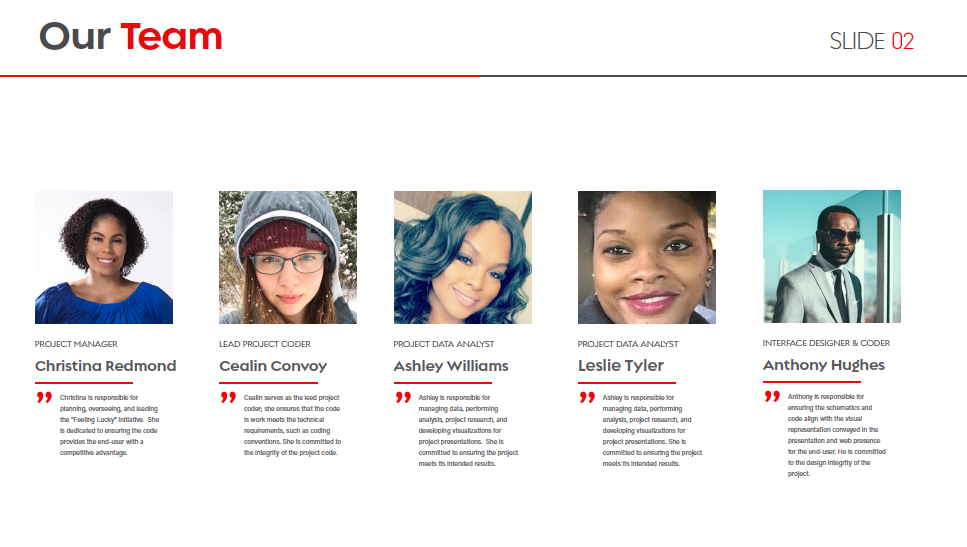

#### Feeling Lucky? What data can tell you about winning the lottery!!!
#### Group 4: Ashley Williams, Anthony Hughes, Cealin Conroy, Christina Redmond, Leslie Tyler, 

Description: 
Project Team 7 has undertaken the initiative "Feeling Lucky!" Our team is committed to helping society understand how to use lottery trend analysis information to improve their lottery picks. Our team will analyze data sets from several U.S. lottery sources to identify commonalities. Project Team 7 is particularly interested in identifying the following: 
1.	The frequency with which specific winning numbers occur
2.	Numbers groups that result in winning strings 
3.	Are you feeling lucky? Pick a number!!
The project team believes its research will provide a resource to improve its chances of living the American dream, a leisure lifestyle sipping lattes, and checking our lottery portfolio.


Questions to answer:
Can data help you win the lottery?
What are the most common winning numbers?
Based off listed probability of winning... does it differ between state? 
If so, is it just chance or does the period of time the lottery has been running in that state account for it?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import requests
import random
import os
import xlrd

### PICK3 GAME!!! ARE YOU FEELING LUCKY

In [2]:
#Read excel files
pick3 = pd.read_excel("Resource/pick3.xlsm") 

# Concatenate Num1, Num2, Num3 becasue the dataframe would drop the "0" digit in Num1

pick3['WinningNumber'] = ''
pick3['WinningNumber'] = pick3['WinningNumber'].map(str) + pick3['Num1'].astype(str) + pick3['Num2'].astype(str) + pick3['Num3'].astype(str)
pick3.head()

,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber
0,2018-01-01,Maryland,Midday,9,1,5,915
1,2018-01-01,Maryland,Evening,8,2,1,821
2,2018-01-01,Virginia,Midday,9,9,1,991
3,2018-01-01,Virginia,Evening,4,2,6,426
4,2018-01-01,"Washington,DC",Midday,5,9,3,593


### PICK 3 CHARTS for HOT, WARM, COLD Numbers 📊 📈 💹 💵

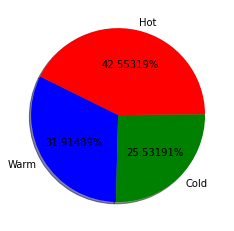

In [3]:
import matplotlib.pyplot as plt
test_x = ["Hot", "Warm", "Cold"]

# Labels for the sections of our pie chart
labels = ["Hot", "Warm", "Cold", ]

# The values of each section of the pie chart
sizes = [100, 75, 60]

# The colors of each section of the pie chart
colors = ["red", "blue", "green"]

explode = (0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.5f%%", shadow=True, startangle=.5)

plt.savefig("Images/Pick3Pie")

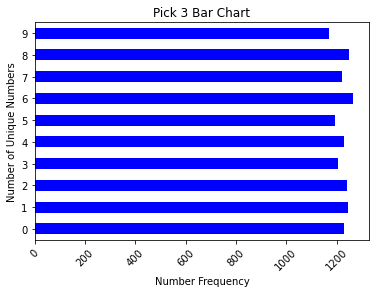

In [4]:
state = pick3['State']
totals = pick3['Num1'].value_counts() + pick3['Num2'].value_counts() + pick3['Num3'].value_counts()
y_axis = pick3.values
x_axis = pick3.values
plt.xlabel('Number Frequency')
plt.ylabel('Number of Unique Numbers') 
plt.title("Pick 3 Bar Chart")
totals.plot(kind="barh", color="blue")
plt.xticks(rotation="45")

plt.savefig("Images/Pick3BarH")

In [5]:
# What are the most frequent number in Pick 3 (Hot, Cold)
pick3['WinningNumber'].head()

0    915
1    821
2    991
3    426
4    593
Name: WinningNumber, dtype: object

In [6]:
# Frequency Generator for Pick 3
num1_freq = pick3['Num1'].value_counts().index.to_list()
num2_freq = pick3['Num2'].value_counts().index.to_list()
num3_freq = pick3['Num3'].value_counts().index.to_list()

print (num1_freq, 
       num2_freq, 
       num3_freq)

[6, 7, 3, 4, 2, 8, 5, 9, 0, 1] [1, 4, 0, 2, 6, 8, 9, 3, 5, 7] [8, 1, 2, 6, 7, 0, 5, 3, 4, 9]


In [7]:
# Pick3 Numbers and Frequency 
#Frequency Loop
win = []
for col in ["Num1", "Num2", "Num3"]:
    win_series = pick3[col].value_counts()
    win_series.name = col
    win.append(win_series)
    #print(win_series)
    #print()

In [8]:
# Best 3 Frequency Number for Column Num1, Num2, Num3
best1 = num1_freq[0:3]
best2 = num2_freq[0:3]
best3 = num3_freq[0:3]

In [9]:
#Generate random number based of best1,2,3
gen1 = random.choice(best1)
gen2 = random.choice(best2)
gen3 = random.choice(best3)

gen_pick3 = f'{gen1}{gen2}{gen3}'

gen_pick3

'642'

In [10]:
#Input any number see how many times it wins straight 
straight = pick3.loc[pick3['WinningNumber'] == gen_pick3]
straight


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber
485,2018-03-30,Maryland,Evening,6,4,2,642
945,2018-06-24,Maryland,Evening,6,4,2,642
2598,2019-04-25,Virginia,Midday,6,4,2,642
3061,2019-07-18,"Washington,DC",Evening,6,4,2,642
3874,2019-12-13,Virginia,Evening,6,4,2,642
3936,2019-12-25,Maryland,Evening,6,4,2,642
3995,2020-01-06,"Washington,DC",Midday,6,4,2,642


In [27]:
# Loop for Sorted Number

pick3['SortedNumber'] = None

for index, row in pick3.iterrows():
    #print(row['WinningNumber'])
    row = [char for char in row['WinningNumber']]
    #print(row)
    box = ''.join(sorted(row))
    pick3.loc[index,'SortedNumber'] = box

In [28]:
#Generator for Sorted Number
gen_box_pick3 = ''.join(sorted([g for g in gen_pick3]))
gen_box_pick3

'246'

In [29]:
box = pick3.loc[pick3['SortedNumber'] == gen_box_pick3]
box.head()

,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
3,2018-01-01,Virginia,Evening,4,2,6,426,246
90,2018-01-17,Maryland,Evening,6,2,4,624,246
167,2018-01-31,Maryland,Midday,2,4,6,246,246
485,2018-03-30,Maryland,Evening,6,4,2,642,246
556,2018-04-12,Maryland,Evening,2,4,6,246,246


In [15]:
# Feeling lucky? Pick a number (Pick3)

user_num = input('Feeling lucky? Pick a number: ')

user_num

straight_user_pick3 = user_num
box_user_pick3 = ''.join(sorted(user_num))

Feeling lucky? Pick a number: 404


In [30]:
straight = pick3.loc[pick3['WinningNumber'] == straight_user_pick3]
print(f'{straight_user_pick3} came out {len(straight)} times (Straight) from January 2018 to January 2020')
straight

404 came out 8 times (Straight) from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
99,2018-01-18,"Washington,DC",Evening,4,0,4,404,044
1060,2018-07-16,Maryland,Midday,4,0,4,404,044
1631,2018-11-01,Virginia,Midday,4,0,4,404,044
1826,2018-12-06,Maryland,Evening,4,0,4,404,044
2163,2019-02-05,Virginia,Midday,4,0,4,404,044
2529,2019-04-13,Maryland,Midday,4,0,4,404,044
3384,2019-09-15,"Washington,DC",Evening,4,0,4,404,044
3798,2019-11-29,"Washington,DC",Evening,4,0,4,404,044


In [32]:
box = pick3.loc[pick3['SortedNumber'] == box_user_pick3]

print(f'{box_user_pick3} came out {len(box)} times (Box) from January 2018 to January 2020')

box

044 came out 18 times (Box) from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
99,2018-01-18,"Washington,DC",Evening,4,0,4,404,044
323,2018-02-28,"Washington,DC",Evening,4,4,0,440,044
634,2018-04-26,Virginia,Evening,0,4,4,044,044
1060,2018-07-16,Maryland,Midday,4,0,4,404,044
1631,2018-11-01,Virginia,Midday,4,0,4,404,044
1761,2018-11-24,"Washington,DC",Evening,4,4,0,440,044
1826,2018-12-06,Maryland,Evening,4,0,4,404,044
2163,2019-02-05,Virginia,Midday,4,0,4,404,044
2243,2019-02-19,"Washington,DC",Midday,4,4,0,440,044
2529,2019-04-13,Maryland,Midday,4,0,4,404,044


In [47]:
dc_box = pick3.loc[(pick3['State'] == 'Washington,DC') & (pick3['SortedNumber'] == box_user_pick3)]
print(f'{box_user_pick3} came out {len(dc_box)} in Washington,DC from January 2018 to January 2020')

dc_box

044 came out 7 in Washington,DC from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
99,2018-01-18,"Washington,DC",Evening,4,0,4,404,044
323,2018-02-28,"Washington,DC",Evening,4,4,0,440,044
1761,2018-11-24,"Washington,DC",Evening,4,4,0,440,044
2243,2019-02-19,"Washington,DC",Midday,4,4,0,440,044
3090,2019-07-23,"Washington,DC",Evening,4,4,0,440,044
3384,2019-09-15,"Washington,DC",Evening,4,0,4,404,044
3798,2019-11-29,"Washington,DC",Evening,4,0,4,404,044


In [41]:
va_box = pick3.loc[(pick3['State'] == 'Virginia') & (pick3['SortedNumber'] == box_user_pick3)]

print(f'{box_user_pick3} came out {len(va_box)} in the state of Virginia from January 2018 to January 2020')

va_box


044 came out 5 in the state of Virginia from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
634,2018-04-26,Virginia,Evening,0,4,4,044,044
1631,2018-11-01,Virginia,Midday,4,0,4,404,044
2163,2019-02-05,Virginia,Midday,4,0,4,404,044
2699,2019-05-13,Virginia,Evening,4,4,0,440,044
3818,2019-12-03,Virginia,Midday,4,4,0,440,044


In [43]:
md_box = pick3.loc[(pick3['State'] == 'Maryland') & (pick3['SortedNumber'] == box_user_pick3)]

print(f'{box_user_pick3} came out {len(md_box)} in the state of Maryland from January 2018 to January 2020')

md_box

044 came out 6 in the state of Maryland from January 2018 to January 2020


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
1060,2018-07-16,Maryland,Midday,4,0,4,404,044
1826,2018-12-06,Maryland,Evening,4,0,4,404,044
2529,2019-04-13,Maryland,Midday,4,0,4,404,044
2696,2019-05-13,Maryland,Midday,0,4,4,044,044
3470,2019-10-01,Maryland,Evening,4,4,0,440,044
3515,2019-10-09,Maryland,Midday,4,4,0,440,044


### PICK 4 GAME! ARE YOU FEEL LUCKY

In [20]:
pick4 = pd.read_excel("Resource/pick4.xlsm") 

# Concatenate Num1, Num2, Num3 becasue the dataframe would drop the "0" digit in Num1
pick4['Winning Number'] = ''
pick4['Winning Number'] = pick4['Winning Number'].map(str) + pick4['Num1'].astype(str) + pick4['Num2'].astype(str) + pick4['Num3'].astype(str) + pick4['Num4'].astype(str) 
pick4.head()

,Date,State,Time of Day,Num1,Num2,Num3,Num4,Winning Number
0,2018-01-01,Maryland,Midday,1,6,0,9,1609
1,2018-01-01,Maryland,Evening,8,5,7,1,8571
2,2018-01-01,Virginia,Midday,0,9,9,8,0998
3,2018-01-01,Virginia,Night,0,8,9,9,0899
4,2018-01-01,Virginia,Midday,0,9,9,8,0998


In [21]:
# What are the most frequent number in Pick 3 (Hot, Cold)
pick4['Winning Number'].head()

0    1609
1    8571
2    0998
3    0899
4    0998
Name: Winning Number, dtype: object

In [22]:
# Pick 4 Number and Frequency

In [23]:
num1_freq = pick3['Num1'].value_counts().index.to_list()
num2_freq = pick3['Num2'].value_counts().index.to_list()
num3_freq = pick3['Num3'].value_counts().index.to_list()
num4_freq = pick4['Num4'].value_counts().index.to_list()

In [24]:
num1_freq

[6, 7, 3, 4, 2, 8, 5, 9, 0, 1]